In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read
import librosa as lb
from librosa import display

SAMPLE_RATE = 44100    

In [111]:
# Seems like it is stereo file, just take one side. I took Left speaker
esg_audio = [read("HW3_audio/esg/esg_{}.wav".format(i))[1][:,0] for i in range(10,20)]
ilber_audio = [read("HW3_audio/ilber/ilber_{}.wav".format(i))[1][:,0] for i in range(10,20)]

In [147]:
# scipy.fft algorithm returns a list yf of complex-valued 
# amplitudes of the frequencies found in the signal.
# Following function takes samples as input and plots 
# the frequency graph
import scipy
def fft(audio):
    yf = scipy.fft.fft(audio/max(abs(audio)))
    return yf


def fft_show(fft_audio):
    n = len(fft_audio)
    T = 1/SAMPLE_RATE
    yf = fft_audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return plt.show()

def mean_fft(audio):
    for i in range(9):
        yf = (fft(audio[i]) + fft(audio[i+1]))/2
    return yf

In [148]:
# This is a frequency plot. 
# This signal is composed of thousands of different frequencies. 
# Magnitudes of frequency values > 10k are very small as most of
# these frequencies are probably due to the noise. We are 
# plotting frequencies ranging from 0 to 24kHz because our 
# signal was sampled at 48k sampling rate and according to the 
# Nyquist sampling theorem, it should only posses
# frequencies ≤ 24000Hz (48000/2).

# Strong frequencies are ranging from 0 to 1kHz only because 
# this audio clip was human speech. We know that in a typical 
# human speech this range of frequencies dominates.

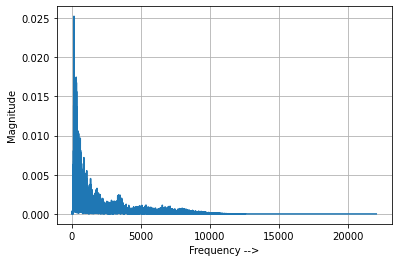

In [149]:
# FFT Plot For Emrah Sefa Gürkan
yf = fft(esg_audio[0])
fft_show(yf)

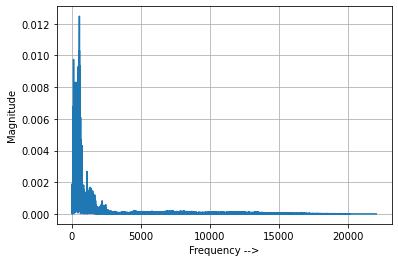

In [150]:
# Fft Plot for İlber Ortaylı
yf = fft(ilber_audio[0])
fft_show(yf)

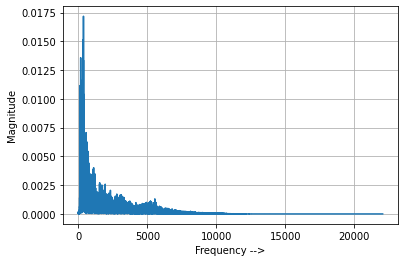

In [151]:
# Mean FFT values for ten audio samples of ESG
mean_fft_esg = mean_fft(esg_audio)
fft_show(mean_fft_esg)

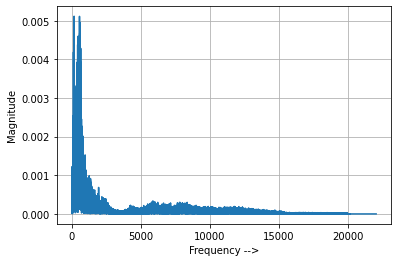

In [152]:
# Mean FFT values for ten audio samples of ESG
mean_fft_ilber = mean_fft(ilber_audio)
fft_show(mean_fft_ilber)

In [153]:
mean_fft_esg.mean()

(0.05798526005289863-1.185843722975029e-17j)

In [154]:
mean_fft_ilber.mean()

(0.05510701907202026+0j)